In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa import seasonal
from statsmodels.tsa.seasonal import seasonal_decompose

In [27]:
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [29]:
df.shape

(93142, 1)

In [4]:
df['login_time'] = pd.to_datetime(df['login_time'])

# Set login_time as the index
df.set_index('login_time', inplace=True)

# Aggregate by 15-minute intervals
login_counts = df.resample('15T').size()

# Display the result
print(login_counts)

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
                      ..
1970-04-13 17:45:00    5
1970-04-13 18:00:00    5
1970-04-13 18:15:00    2
1970-04-13 18:30:00    7
1970-04-13 18:45:00    6
Freq: 15T, Length: 9788, dtype: int64


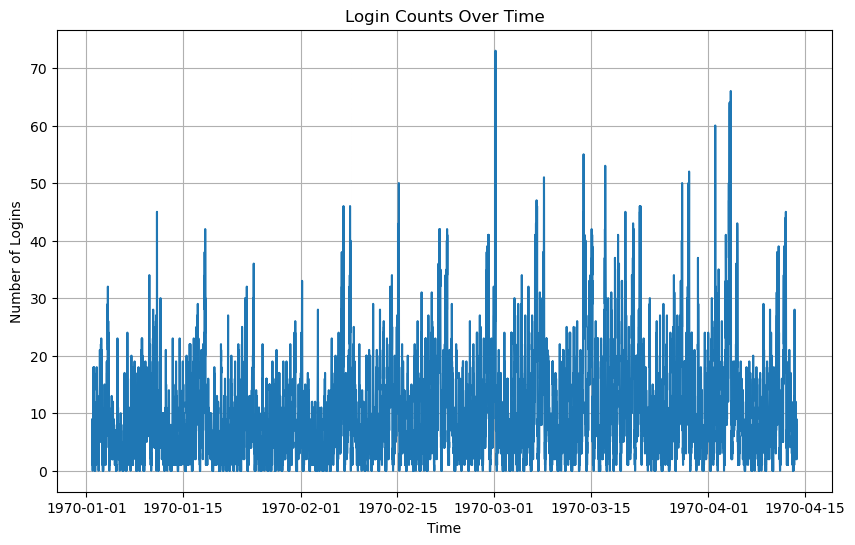

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(login_counts.index, login_counts.values)# , marker='o', linestyle='-', color='b')
plt.title('Login Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.grid(True)
plt.show()

In [10]:
login_counts.describe()

count    9788.000000
mean        9.515938
std         8.328818
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        73.000000
dtype: float64

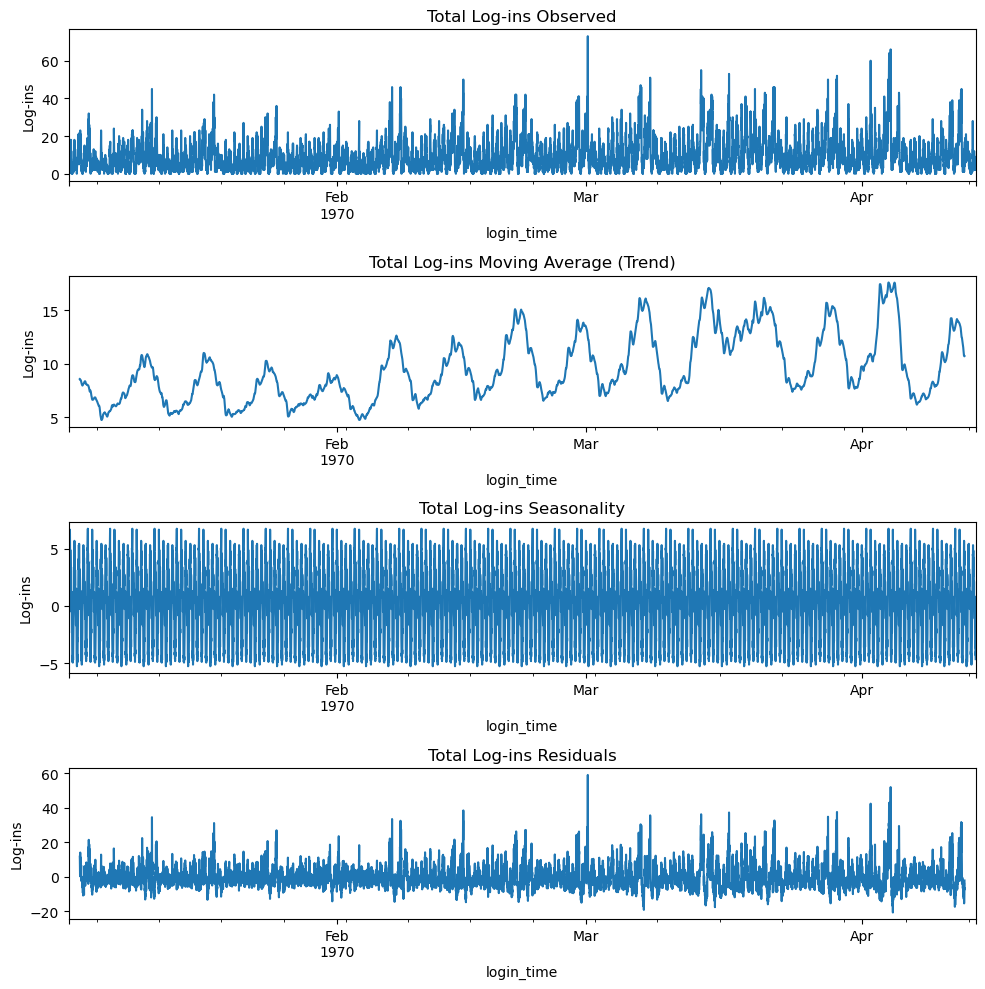

In [44]:
result = sm.tsa.seasonal.seasonal_decompose(login_counts, model='additive', period=240)

# Plotting observed, trend, seasonal, and residual components in a single figure with subplots
plt.figure(figsize=(10, 10))

# Plot observed data
plt.subplot(4, 1, 1)
result.observed.plot()
plt.title('Total Log-ins Observed')
plt.ylabel('Log-ins')

# Plot trend component
plt.subplot(4, 1, 2)
result.trend.plot()
plt.title('Total Log-ins Moving Average (Trend)')
plt.ylabel('Log-ins')

# Plot seasonal component
plt.subplot(4, 1, 3)
result.seasonal.plot()
plt.title('Total Log-ins Seasonality')
plt.ylabel('Log-ins')

# Plot residuals component
plt.subplot(4, 1, 4)
result.resid.plot()
plt.title('Total Log-ins Residuals')
plt.ylabel('Log-ins')

# Adjust layout
plt.tight_layout()
plt.show()


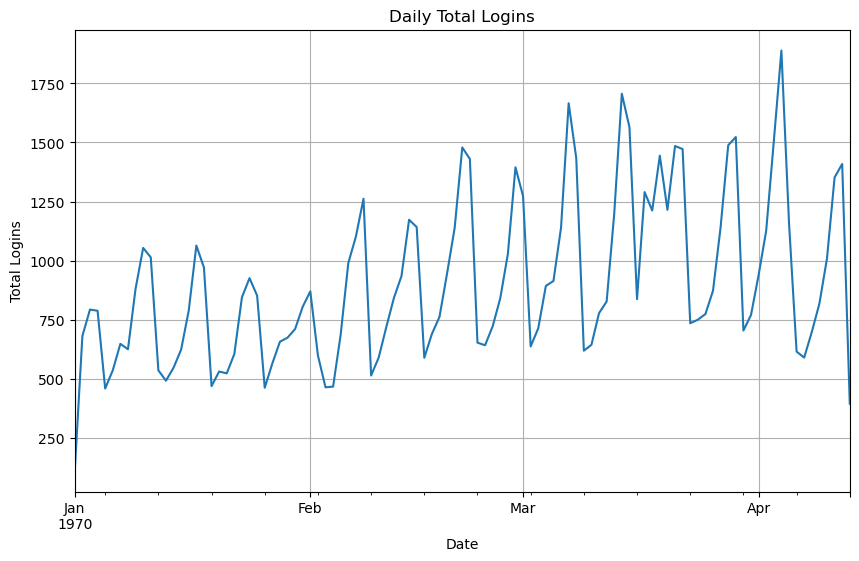

In [45]:
daily_logins = login_counts.resample('D').sum()

# Plot the daily logins
plt.figure(figsize=(10, 6))
daily_logins.plot()
plt.title('Daily Total Logins')
plt.xlabel('Date')
plt.ylabel('Total Logins')
plt.grid(True)
plt.show()

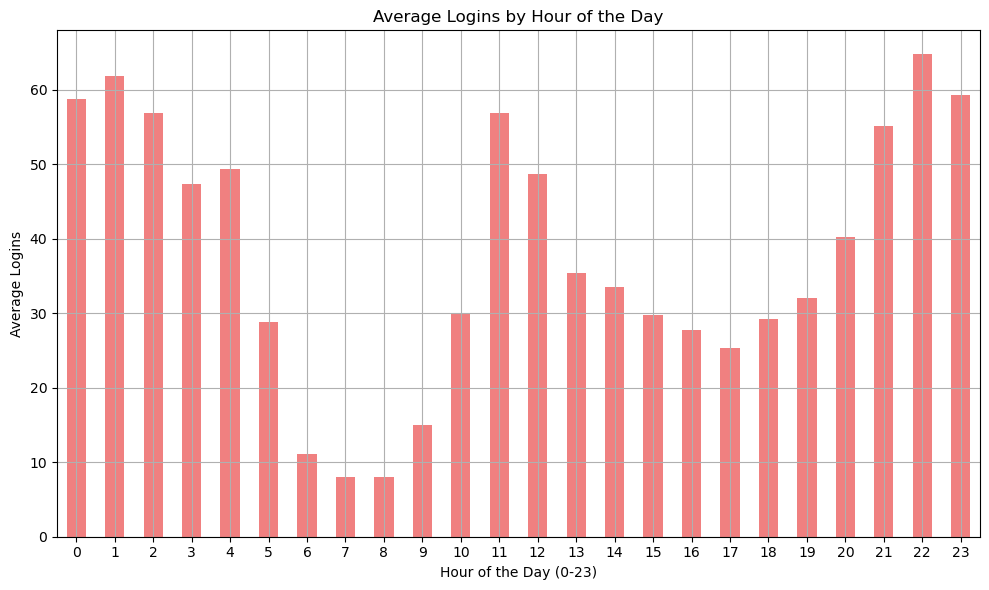

In [46]:
hourly_logins = login_counts.resample('H').sum()

# Create a new column with the hour of the day
hourly_logins_by_hour = hourly_logins.groupby(hourly_logins.index.hour).mean()

# Plot the average logins per hour of the day
plt.figure(figsize=(10, 6))
hourly_logins_by_hour.plot(kind='bar', color='lightcoral')
plt.title('Average Logins by Hour of the Day')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Average Logins')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

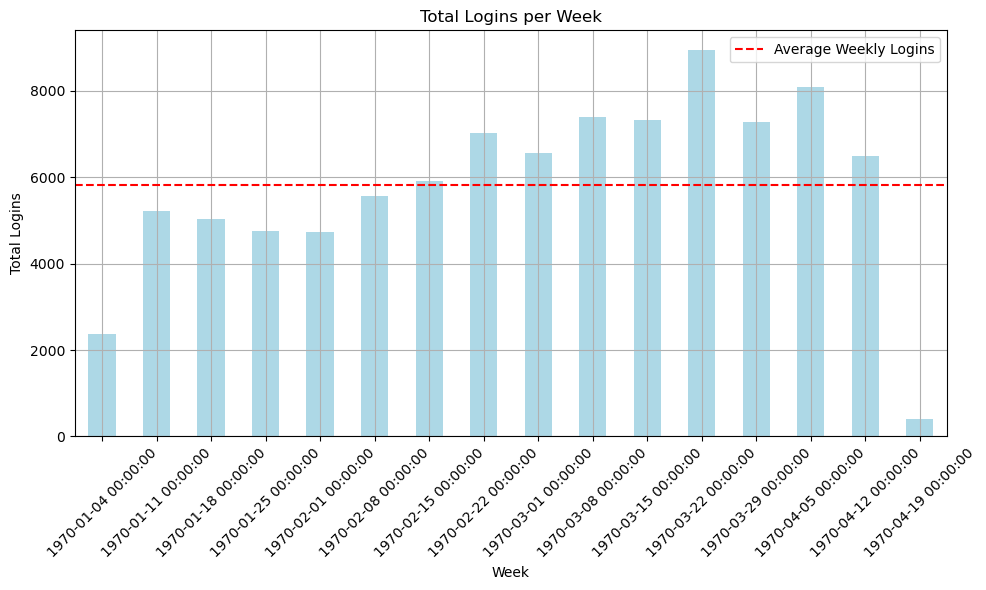

In [47]:
weekly_logins = login_counts.resample('W').sum()

# Calculate average logins per week
average_weekly_logins = weekly_logins.mean()

# Plot average weekly logins
plt.figure(figsize=(10, 6))
weekly_logins.plot(kind='bar', color='lightblue')
plt.axhline(y=average_weekly_logins, color='red', linestyle='--', label='Average Weekly Logins')
plt.title('Total Logins per Week')
plt.xlabel('Week')
plt.ylabel('Total Logins')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

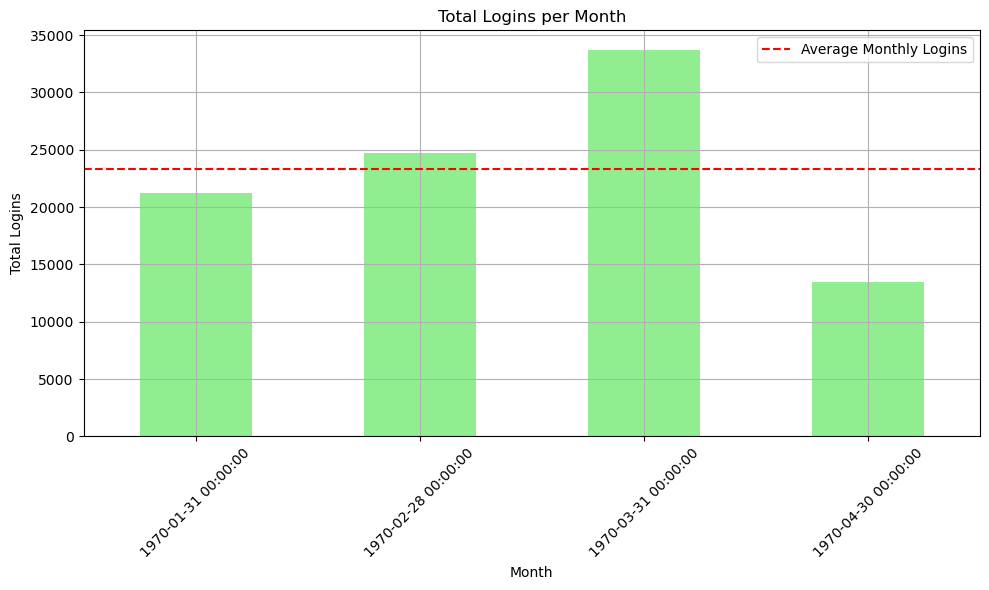

In [48]:
monthly_logins = login_counts.resample('M').sum()

# Calculate average logins per month
average_monthly_logins = monthly_logins.mean()

# Plot average monthly logins
plt.figure(figsize=(10, 6))
monthly_logins.plot(kind='bar', color='lightgreen')
plt.axhline(y=average_monthly_logins, color='red', linestyle='--', label='Average Monthly Logins')
plt.title('Total Logins per Month')
plt.xlabel('Month')
plt.ylabel('Total Logins')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Summary of Findings from Visualizations
* __Hourly Patterns__: Through visualizations, I observed that most logins occur during the first four hours of the day, indicating a peak in user activity early on. However, there is a significant dip in logins between 6 AM and 9 AM, likely due to users transitioning into their daily routines.

* __Weekly Average Logins__: My analysis of weekly averages revealed that from the first week of January to the first week of February, logins were consistently below average. This pattern suggests a post-holiday slowdown in engagement. Notably, the highest average logins were around March 15, indicating a resurgence in user activity, possibly linked to marketing efforts or seasonal events.

* __Monthly Average Logins__: The monthly analysis showed that April had the highest overall logins, yet both January and April experienced periods of below-average activity. This suggests that while user engagement peaked in April, fluctuations might have been influenced by competing events or significant holidays.